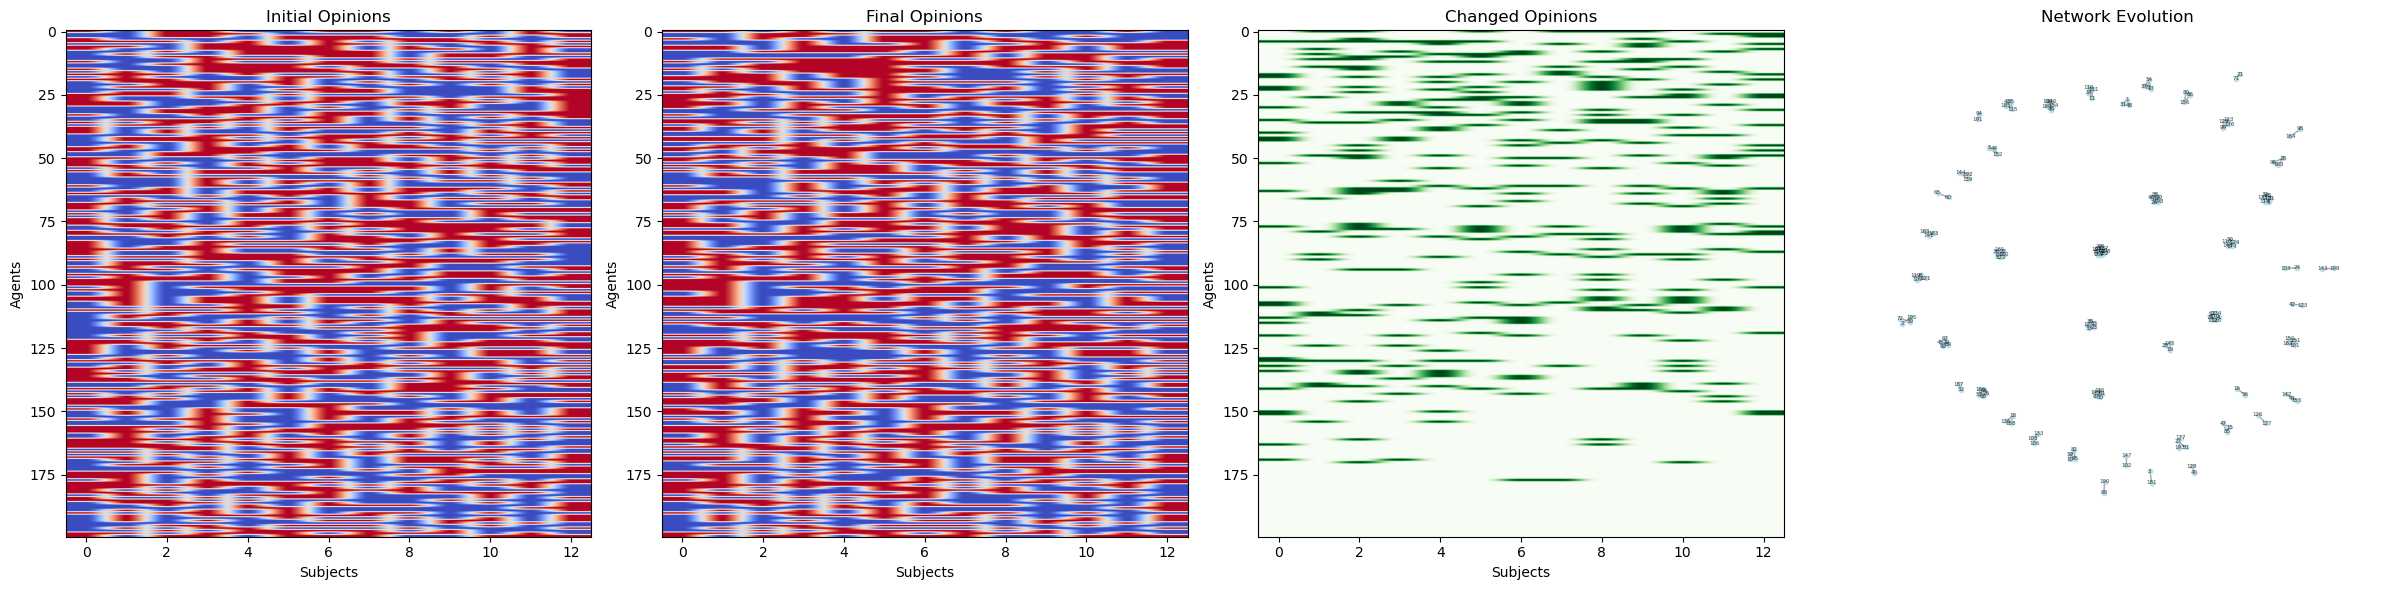


Network Parameters (Threshold 2):
Nodes: 165
Edges: 291
Average Degree: 3.5272727272727273
Clustering Coefficient: 0.7818181818181819


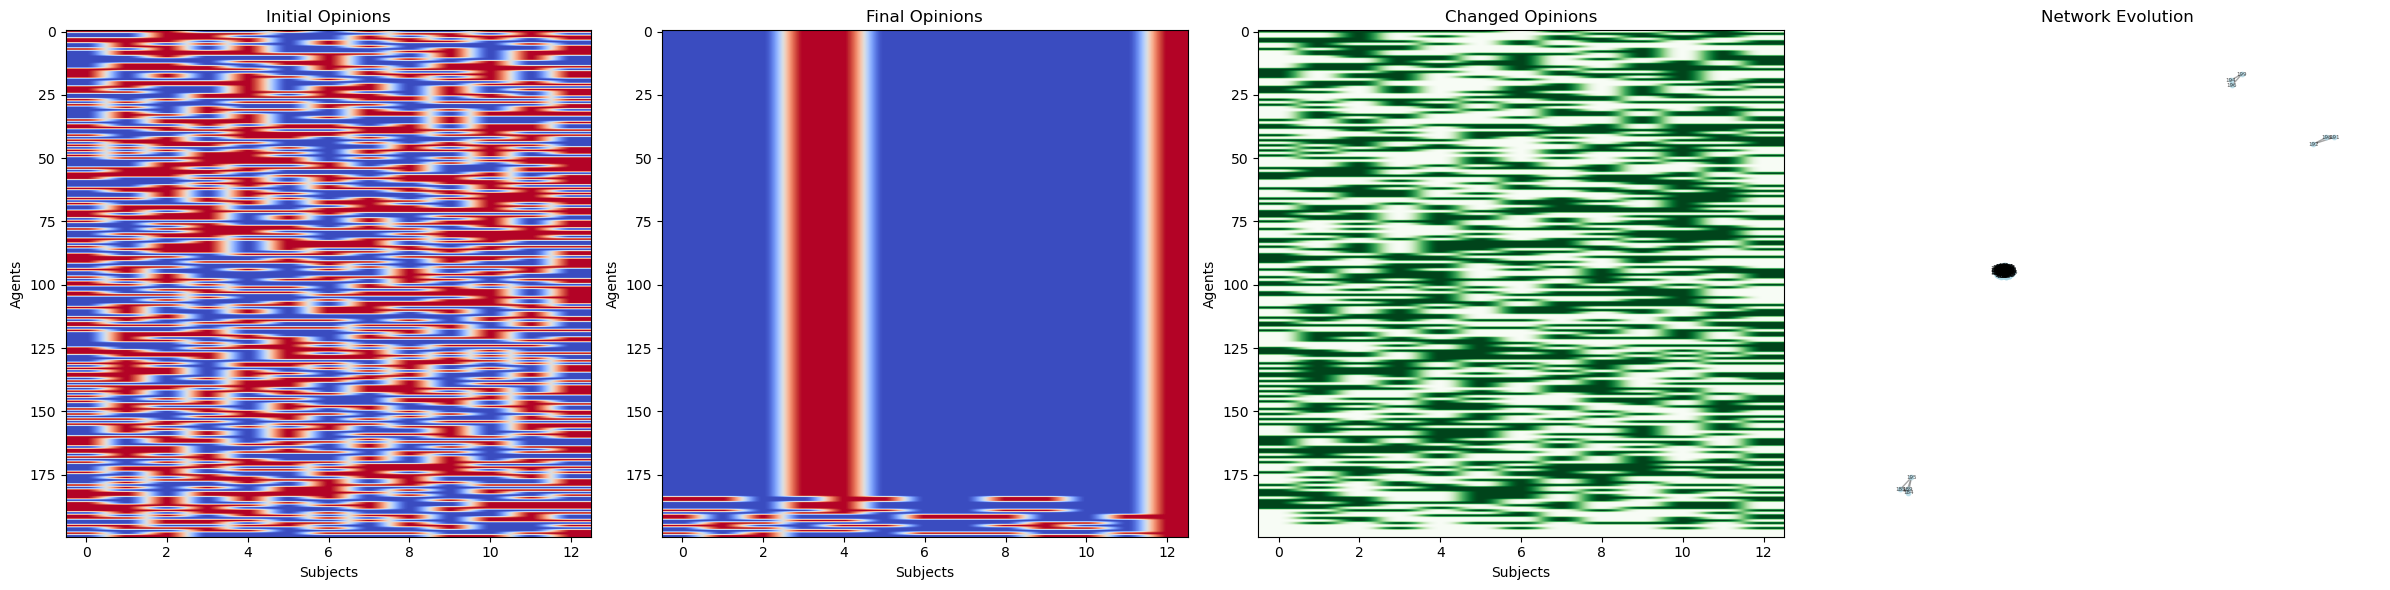


Network Parameters (Threshold 5):
Nodes: 200
Edges: 17967
Average Degree: 179.67
Clustering Coefficient: 1.0


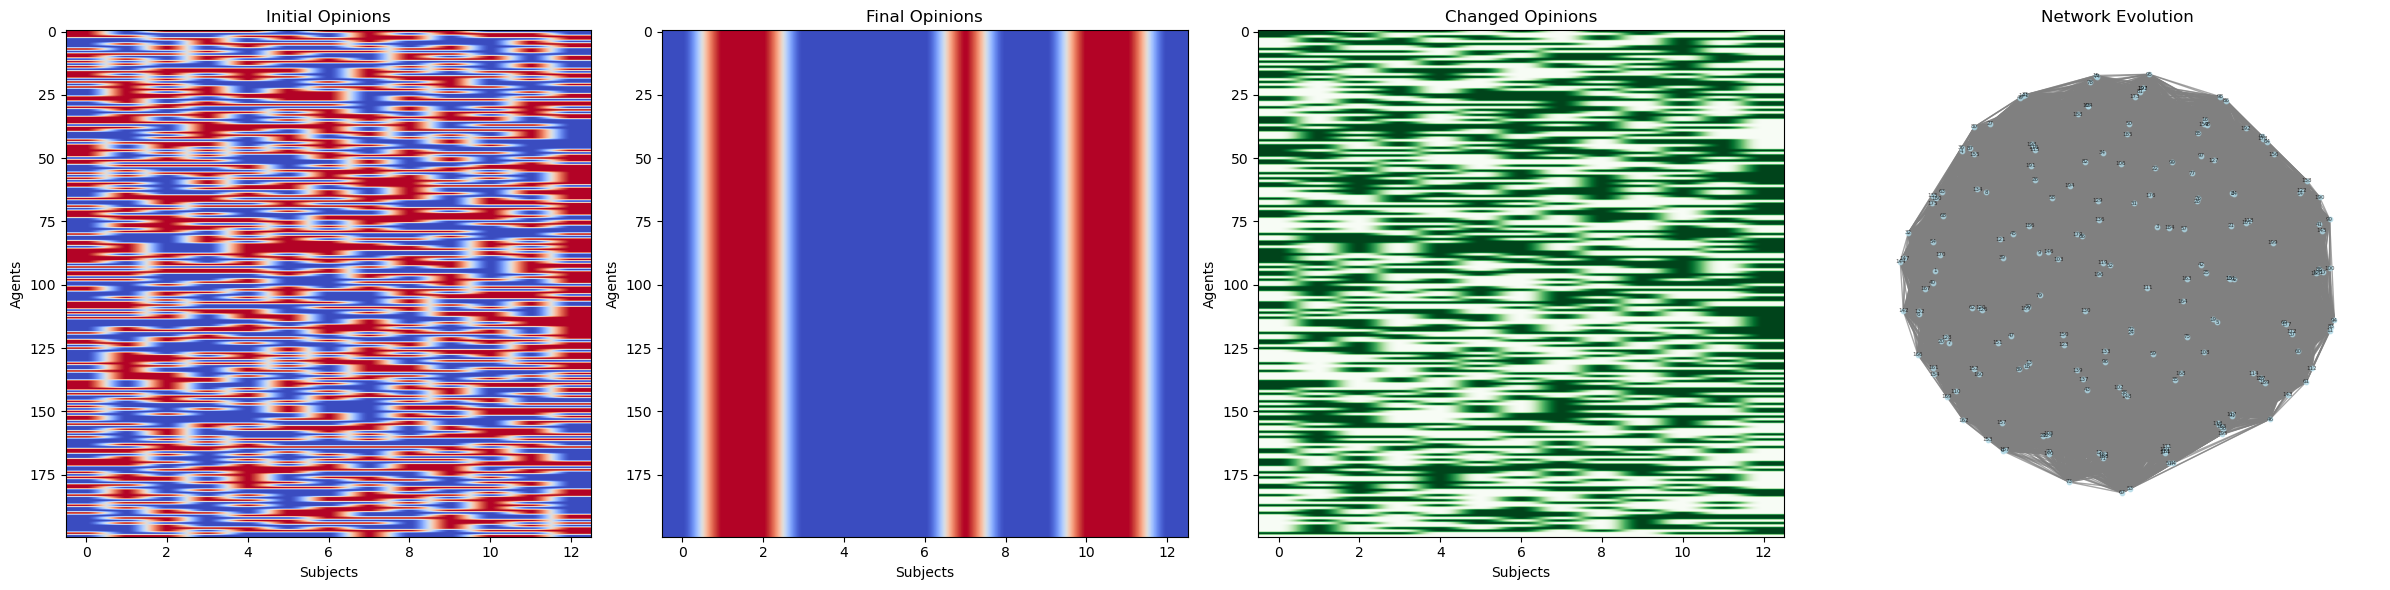


Network Parameters (Threshold 7):
Nodes: 200
Edges: 19900
Average Degree: 199.0
Clustering Coefficient: 1.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def initialize_agents(num_agents, num_subjects):
    return np.random.choice([0, 1], size=(num_agents, num_subjects))

def plot_opinions(ax, opinions, title):
    ax.imshow(opinions, cmap='coolwarm', aspect='auto')
    ax.set_title(title)
    ax.set_xlabel('Subjects')
    ax.set_ylabel('Agents')

def plot_changes(ax, initial_opinions, final_opinions):
    changes = initial_opinions != final_opinions
    ax.imshow(changes, cmap='Greens', aspect='auto')
    ax.set_title('Changed Opinions')
    ax.set_xlabel('Subjects')
    ax.set_ylabel('Agents')

def adjust_opinions(opinions, threshold, G):
    num_agents, num_subjects = opinions.shape
    for i in range(num_agents):
        for j in range(i + 1, num_agents):
            disagreement = np.sum(opinions[i] != opinions[j])
            if disagreement <= threshold:
                shared_opinions = np.sum(opinions[i] == opinions[j])
                if shared_opinions >= num_subjects - threshold:
                    opinions[i], opinions[j] = opinions[j], opinions[i]
                    G.add_edge(i, j)
    return opinions, G

def calculate_network_parameters(G):
    parameters = {
        'Nodes': G.number_of_nodes(),
        'Edges': G.number_of_edges(),
        'Average Degree': np.mean(list(dict(G.degree()).values())),
        'Clustering Coefficient': nx.average_clustering(G),
        # 'Average Shortest Path Length': nx.average_shortest_path_length(G)
    }
    return parameters

def simulate_opinion_dynamics(num_agents, num_subjects, threshold, num_iterations):
    initial_opinions = initialize_agents(num_agents, num_subjects)
    final_opinions = initial_opinions.copy()

    G = nx.Graph()

    for _ in range(num_iterations):
        final_opinions, G = adjust_opinions(final_opinions, threshold, G)

    fig, axes = plt.subplots(1, 4, figsize=(24, 6))

    plot_opinions(axes[0], initial_opinions, 'Initial Opinions')
    plot_opinions(axes[1], final_opinions, 'Final Opinions')
    plot_changes(axes[2], initial_opinions, final_opinions)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=10, font_size=4, node_color='lightblue', edge_color='gray', alpha=0.7)
    axes[3].set_title('Network Evolution')

    plt.tight_layout()
    plt.savefig(f"vec{threshold}.png")
    plt.show()

    network_parameters = calculate_network_parameters(G)
    print(f"\nNetwork Parameters (Threshold {threshold}):")
    for key, value in network_parameters.items():
        print(f"{key}: {value}")

num_agents = 200
num_subjects = 13
num_iterations = 100

for threshold in [2, 5, 7]:
    simulate_opinion_dynamics(num_agents, num_subjects, threshold, num_iterations)